In [1]:
import numpy as np
import pandas as pd

In [2]:
customers=pd.read_csv('olist_customers_dataset.csv')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
customers.shape

(99441, 5)

In [4]:
# Find number of missing values
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

There are no missing values

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

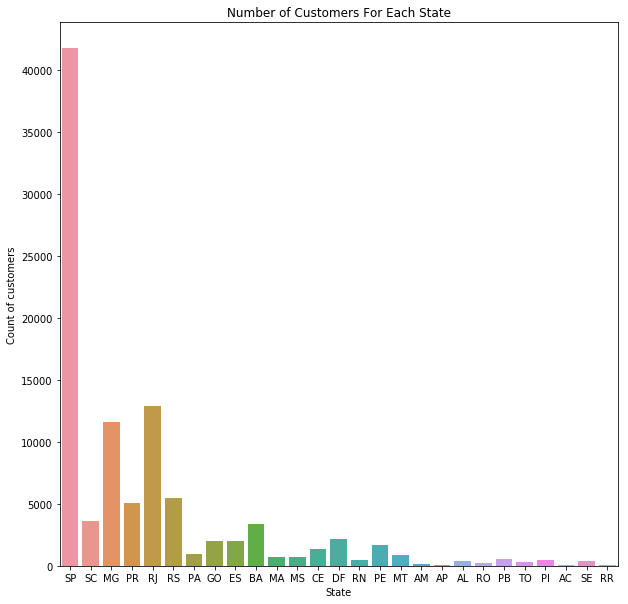

In [69]:
# Univariate Analysis
plt.figure(figsize=(10,10))
sns.countplot(x=customers.customer_state)
plt.xlabel('State')
plt.ylabel('Count of customers')
plt.title('Number of Customers For Each State')
plt.show()

SP has the highest number of customers followed by RJ, MG, RS, and PR

In [10]:
customers.customer_state.nunique()

27

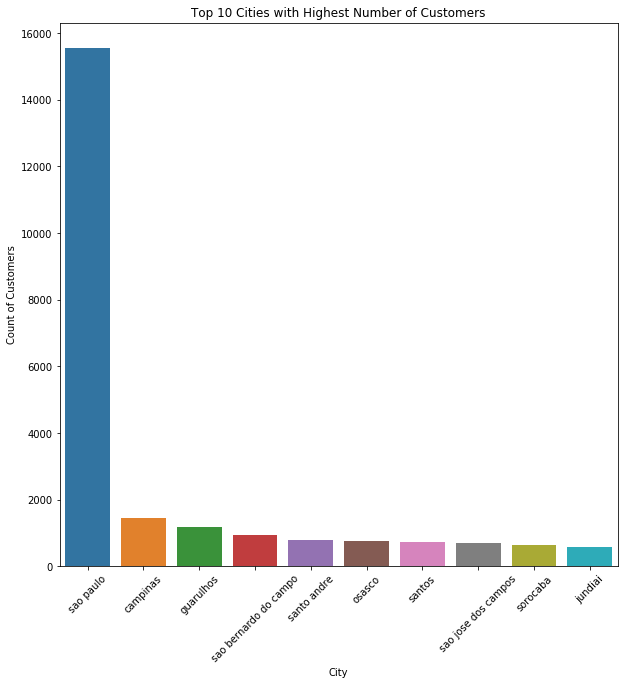

In [65]:
# Within SP state, top 10 cities having the highest number of customers
plt.figure(figsize=(10,10))
sns.barplot(y=customers.loc[customers.customer_state=='SP'].groupby(by='customer_city').count().customer_id.sort_values(ascending=False)[0:10],
             x=customers.loc[customers.customer_state=='SP'].groupby(by='customer_city').count().customer_id.sort_values(ascending=False).index[0:10])
plt.xticks(rotation=45)
plt.ylabel('Count of Customers')
plt.xlabel('City')
plt.title('Top 10 Cities with Highest Number of Customers')
plt.show()

Sao Paulo has the highest number of customers followed by Campinas and Guaruthos.

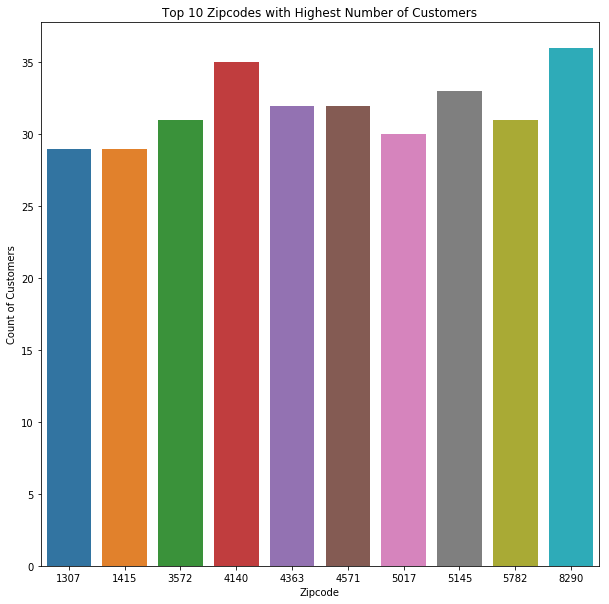

In [68]:
# Within Sao Paulo, top 10 zip codes having the most customers
plt.figure(figsize=(10,10))
sns.barplot(y=customers.loc[(customers.customer_state=='SP') & (customers.customer_city=='sao paulo')].groupby('customer_zip_code_prefix').count().customer_id.sort_values(ascending=False)[0:10],
        x=customers.loc[(customers.customer_state=='SP') & (customers.customer_city=='sao paulo')].groupby('customer_zip_code_prefix').count().customer_id.sort_values(ascending=False).index[0:10])
plt.xlabel('Zipcode')
plt.ylabel('Count of Customers')
plt.title('Top 10 Zipcodes with Highest Number of Customers')
plt.show()

Zipcode 8290 has the highest number of customers, followed by 4140 and 5145